# Project: ReID

## Introduction

We wanted to reidentify a person, given some samples of the dataset. The idea is to learn the main features of the person in order to distinguish him/her from other people.



The first thing that we did was to import libraries.

In [41]:
from sklearn.svm import SVC
from sklearn.svm import SVR

from load_data import DataLoader
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import tqdm
import config
import math
import matplotlib.pyplot as plt
import scikitplot as skplt
from utils import filter_and_split_dataset

The first thing that we did was to read the dataset and extract the information that we need in order to recognize people:

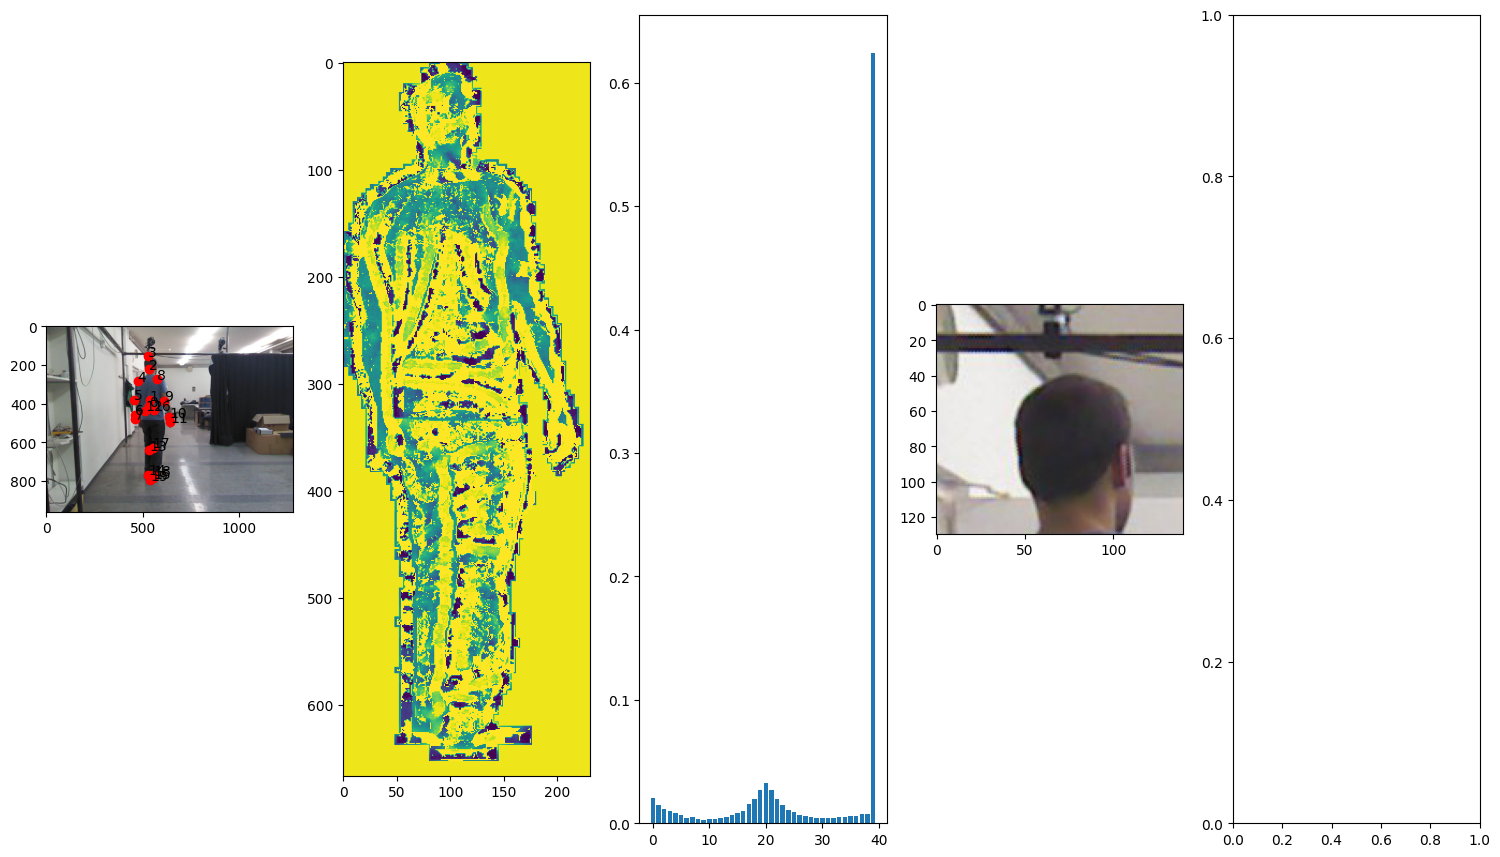

In [42]:
d = DataLoader()
d.read_dataset()
d.shuffle_videos()
d.display_dataset()

The next thing to do was to design the learning setting. The first and easiest idea was to test a variety of classifiers, and see which works better for our features.

We tested different classifiers:

In [43]:
def test_model(name, model_skel, model_clothes, model_face, X_skel, X_clothes, X_face, X_skel_test, X_clothes_test, X_face_test, y_train, y_test, y_face, y_face_test):
    model_skel.fit(X_skel, y_train)
    model_clothes.fit(X_clothes, y_train)
    model_face.fit(X_face, y_face)


    print("-" * 10)
    print("|", name, "|")
    # Test
    print("-" * 10)
    skel_pred = model_skel.predict(X_skel_test)
    print(classification_report(y_test, skel_pred))
    print("-" * 10)
    clothes_pred = model_clothes.predict(X_clothes_test)
    print(classification_report(y_test, clothes_pred))
    print("-" * 10)
    face_pred = model_face.predict(X_face_test)
    print(classification_report(y_face_test, face_pred))

    skel_pred_roc = model_skel.predict_proba(X_skel_test)
    clothes_pred_roc = model_clothes.predict_proba(X_clothes_test)
    face_pred_roc = model_face.predict_proba(X_face_test)

    skplt.metrics.plot_roc(y_test, skel_pred_roc, title= name.split("_")
                           [-1].split(".")[-1] + " skel" + " ROC", plot_micro=True, plot_macro=True, classes_to_plot=[
                           0, 1], ax=None, figsize=None)
    plt.show()
    skplt.metrics.plot_roc(y_test, clothes_pred_roc, title= name.split("_")
                            [-1].split(".")[-1] + " clothes" + " ROC", plot_micro=True, plot_macro=True, classes_to_plot=[
                            0, 1], ax=None, figsize=None)
    plt.show()
    skplt.metrics.plot_roc(y_face_test, face_pred_roc, title= name.split("_")
                            [-1].split(".")[-1] + " face" + " ROC", plot_micro=True, plot_macro=True, classes_to_plot=[
                            0, 1], ax=None, figsize=None)
    plt.show()
    

    skplt.metrics.plot_confusion_matrix(
        y_test, skel_pred, title=name.split("_")[-1].split(".")[-1] + " skel" + " Confusion Matrix", normalize=True)
    plt.show()
    skplt.metrics.plot_confusion_matrix(
        y_test, clothes_pred, title=name.split("_")[-1].split(".")[-1] + " clothes" + " Confusion Matrix", normalize=True)
    plt.show()
    skplt.metrics.plot_confusion_matrix(
        y_face_test, face_pred, title=name.split("_")[-1].split(".")[-1] + " face" + " Confusion Matrix", normalize=True)
    plt.show()
    

In [44]:
X = np.load(config.SAMPLED_PATH + "sample_good_X.npy")
y = np.load(config.SAMPLED_PATH + "sample_good_y.npy")
X_skel, X_clothes, X_face, _, ___, ____, y_train, _____, y_face, ______ = filter_and_split_dataset(X, y)


# X = np.load(config.SAMPLED_PATH + "sample_1_X.npy")
# y = np.load(config.SAMPLED_PATH + "sample_1_y.npy")
X_skel_test, X_clothes_test, X_face_test, _, __, ___, y_test, ____, y_face_test, _____ = filter_and_split_dataset(X, y)



### Decision Tree

----------
| DecisionTreeClassifier |
----------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       750
           1       0.91      0.81      0.86        37

    accuracy                           0.99       787
   macro avg       0.95      0.90      0.93       787
weighted avg       0.99      0.99      0.99       787

----------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       750
           1       0.84      0.84      0.84        37

    accuracy                           0.98       787
   macro avg       0.91      0.91      0.91       787
weighted avg       0.98      0.98      0.98       787

----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00         5

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
wei

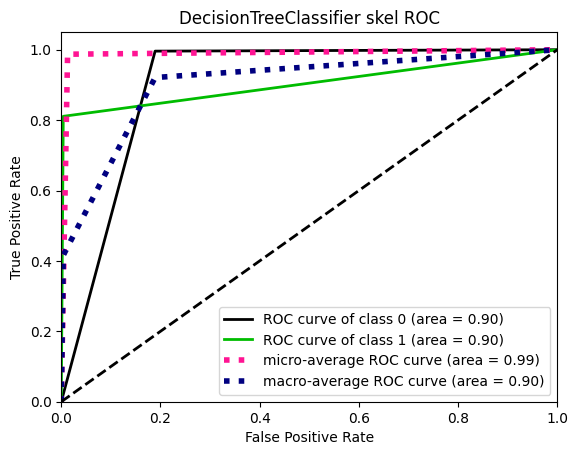

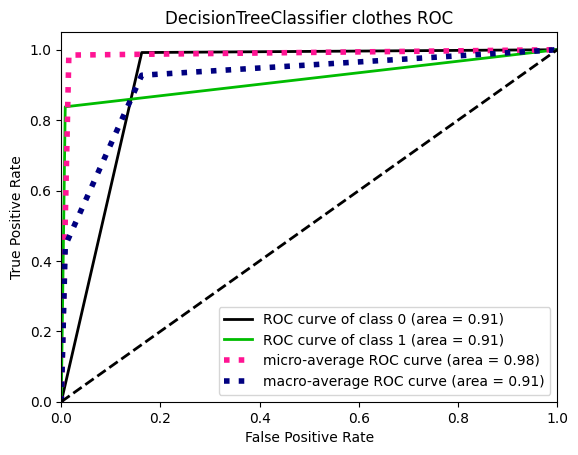

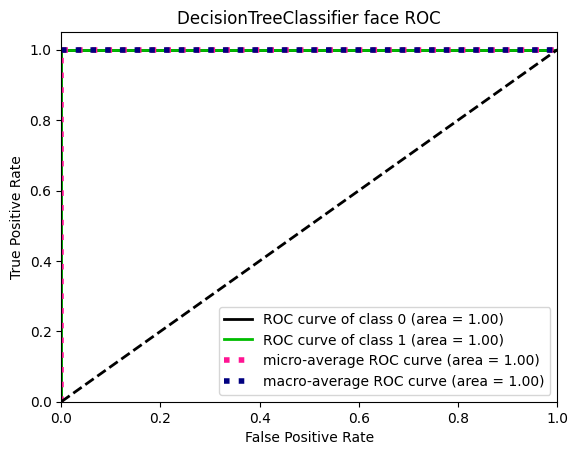

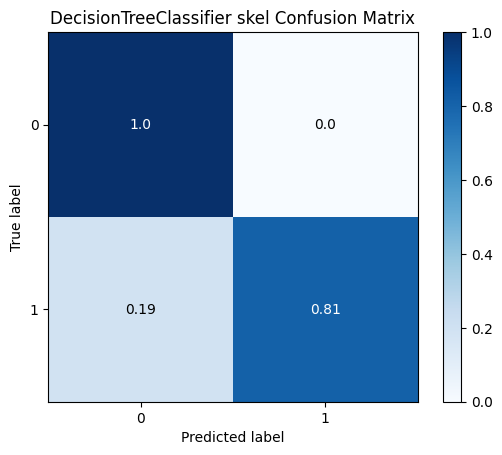

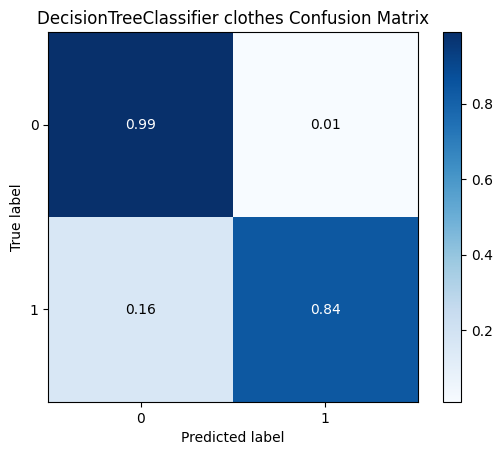

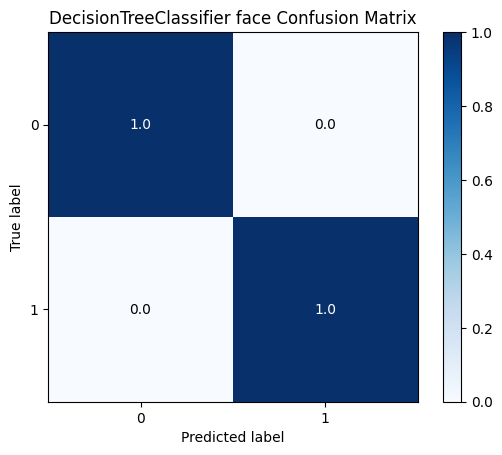

In [45]:
m1 = DecisionTreeClassifier()
m2 = DecisionTreeClassifier()
m3 = DecisionTreeClassifier()
test_model("DecisionTreeClassifier", m1, m2, m3, X_skel, X_clothes, X_face, X_skel_test, X_clothes_test, X_face_test, y_train, y_test, y_face, y_face_test)

### Random Forest

----------
| RandomForestClassifier |
----------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       750
           1       1.00      0.86      0.93        37

    accuracy                           0.99       787
   macro avg       1.00      0.93      0.96       787
weighted avg       0.99      0.99      0.99       787

----------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       750
           1       1.00      0.78      0.88        37

    accuracy                           0.99       787
   macro avg       0.99      0.89      0.94       787
weighted avg       0.99      0.99      0.99       787

----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00         5

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
wei

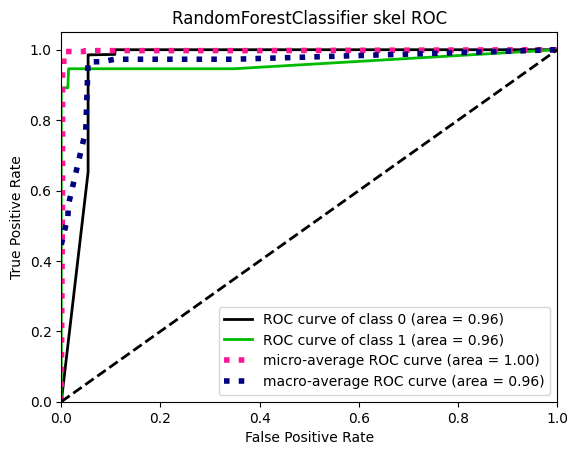

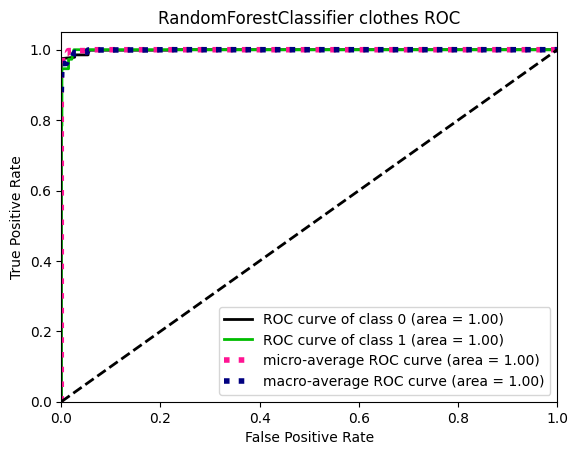

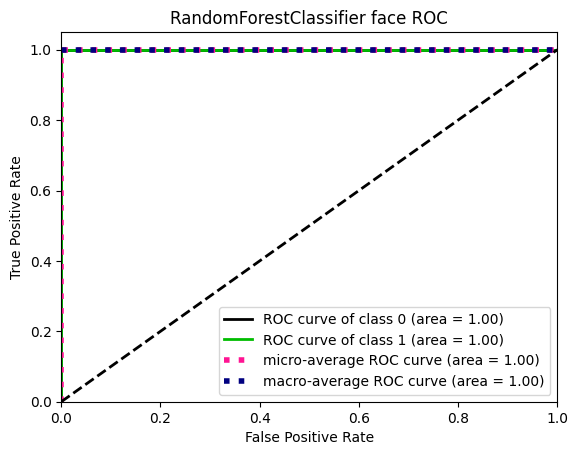

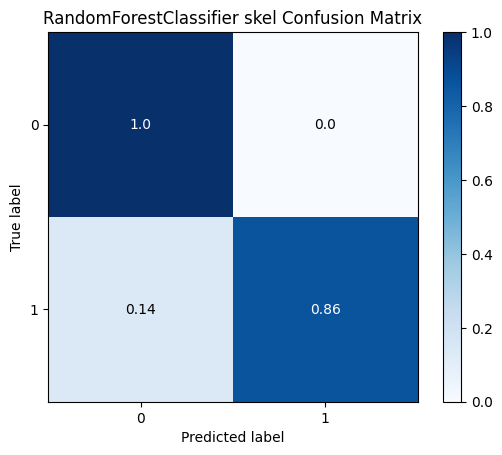

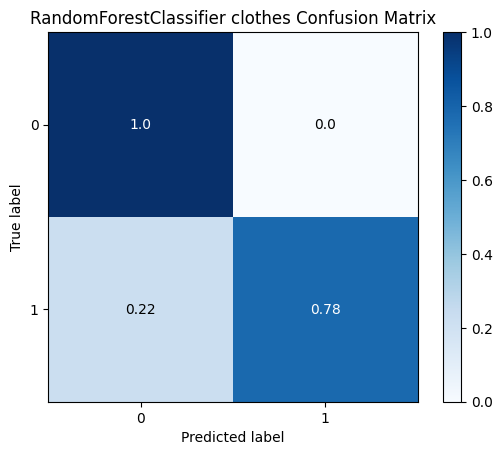

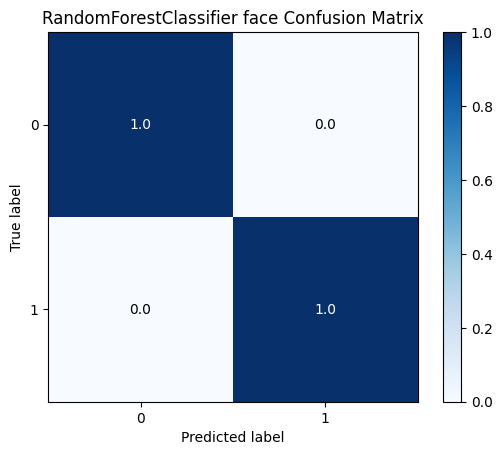

In [46]:
m1 = RandomForestClassifier()
m2 = RandomForestClassifier()
m3 = RandomForestClassifier()
test_model("RandomForestClassifier", m1, m2, m3, X_skel, X_clothes, X_face, X_skel_test, X_clothes_test, X_face_test, y_train, y_test, y_face, y_face_test)

### KNeighbors

----------
| KNeighborsClassifier |
----------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       750
           1       0.83      0.68      0.75        37

    accuracy                           0.98       787
   macro avg       0.91      0.83      0.87       787
weighted avg       0.98      0.98      0.98       787

----------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       750
           1       0.60      0.65      0.62        37

    accuracy                           0.96       787
   macro avg       0.79      0.81      0.80       787
weighted avg       0.96      0.96      0.96       787

----------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       163
           1       0.71      1.00      0.83         5

    accuracy                           0.99       168
   macro avg       0.86      0.99      0.91       168
weigh

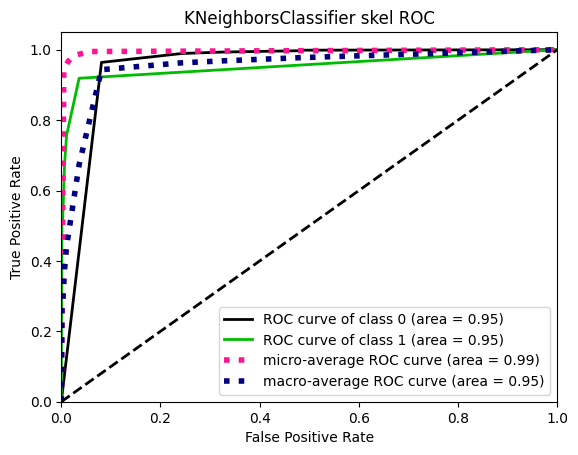

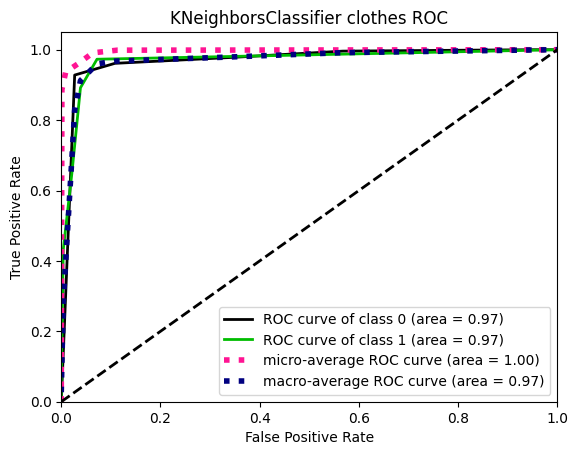

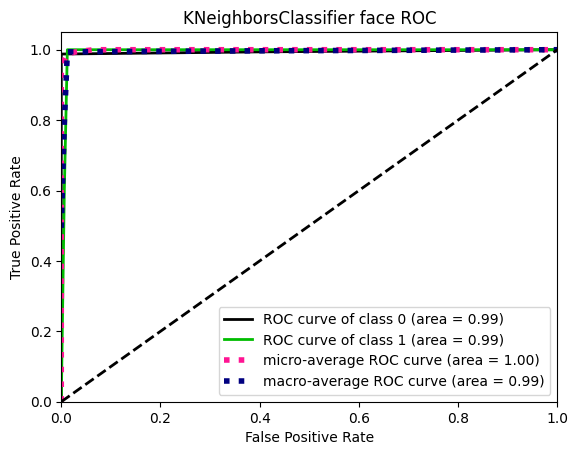

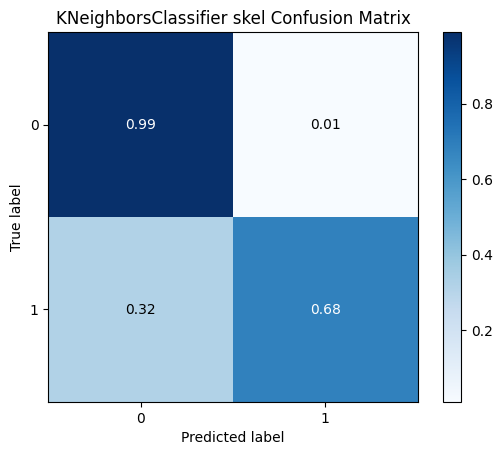

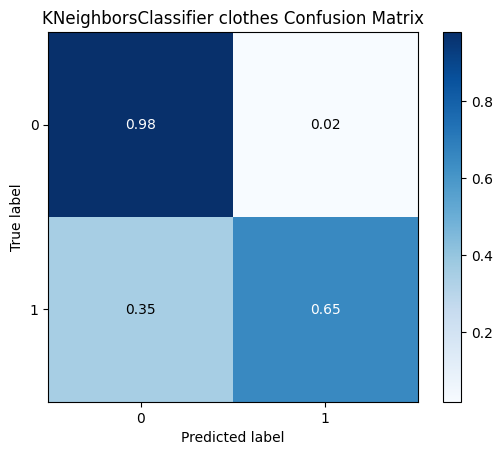

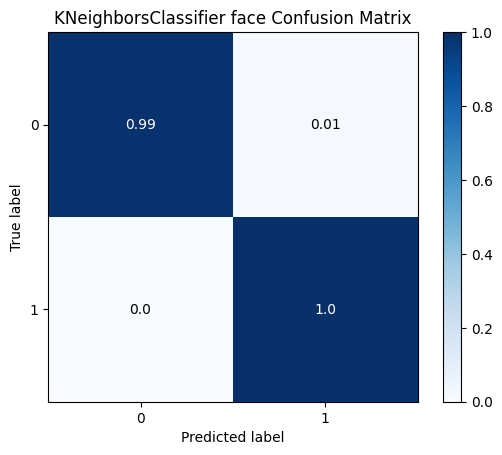

In [47]:
m1 = KNeighborsClassifier()
m2 = KNeighborsClassifier()
m3 = KNeighborsClassifier()
test_model("KNeighborsClassifier", m1, m2, m3, X_skel, X_clothes, X_face, X_skel_test, X_clothes_test, X_face_test, y_train, y_test, y_face, y_face_test)

### Logistic Regession

----------
| LogisticRegression |
----------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       750
           1       0.00      0.00      0.00        37

    accuracy                           0.95       787
   macro avg       0.48      0.50      0.49       787
weighted avg       0.91      0.95      0.93       787

----------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       750
           1       0.00      0.00      0.00        37

    accuracy                           0.95       787
   macro avg       0.48      0.50      0.49       787
weighted avg       0.91      0.95      0.93       787

----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00         5

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighte

/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/si

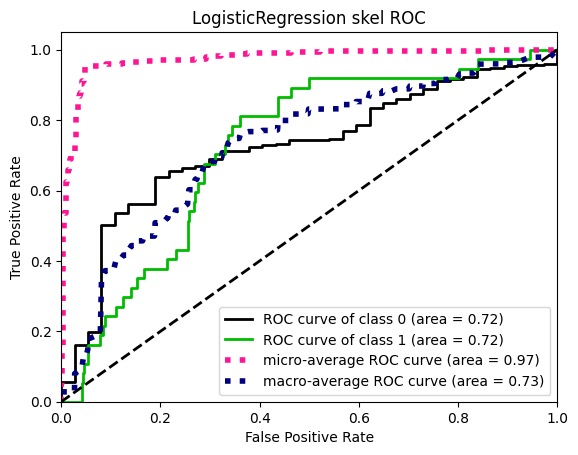

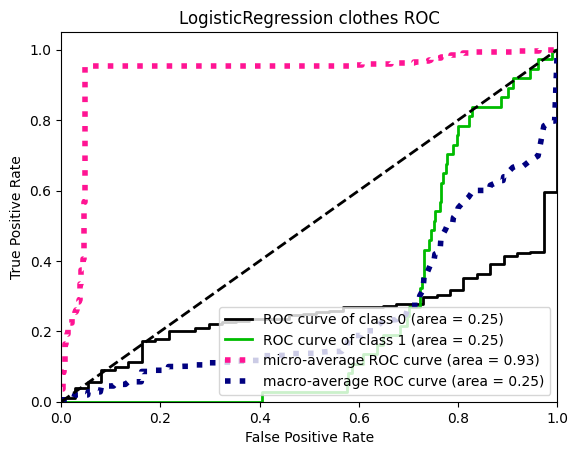

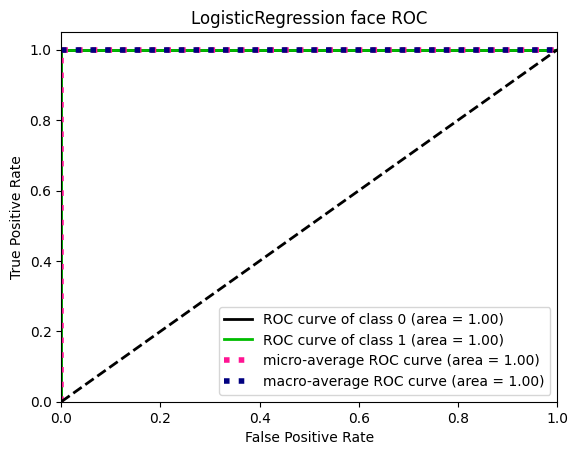

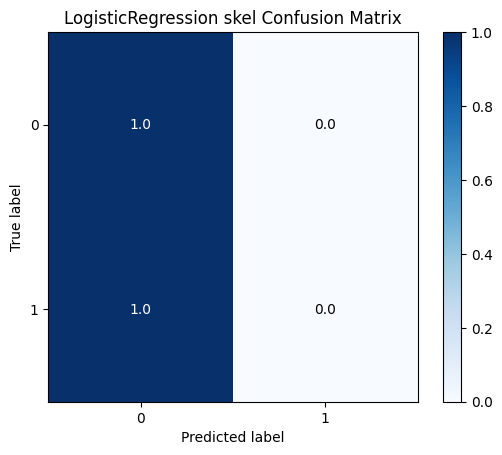

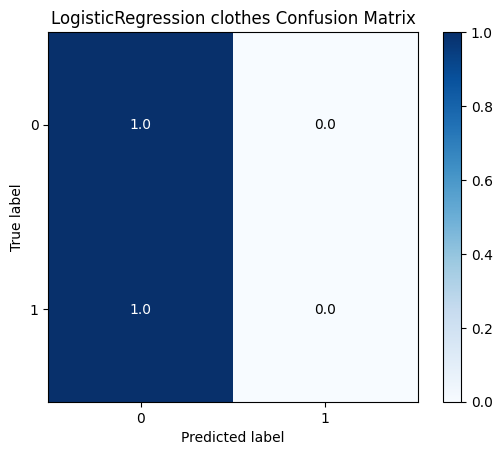

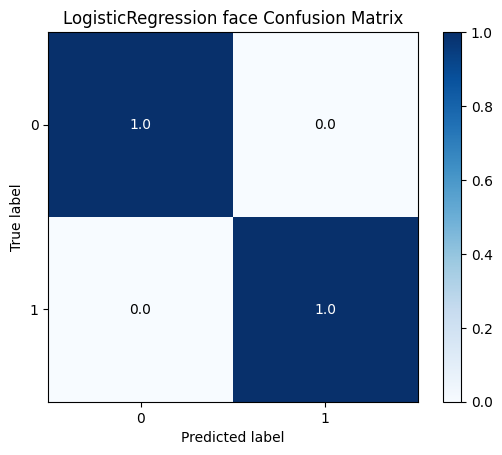

In [48]:
m1 = LogisticRegression(solver="liblinear", max_iter=10000)
m2 = LogisticRegression(solver="liblinear", max_iter=10000)
m3 = LogisticRegression(solver="liblinear", max_iter=10000)
test_model("LogisticRegression", m1, m2, m3, X_skel, X_clothes, X_face, X_skel_test, X_clothes_test,  X_face_test, y_train, y_test, y_face, y_face_test)

### Gaussian NB

----------
| GaussianNB |
----------
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       750
           1       0.03      0.05      0.03        37

    accuracy                           0.86       787
   macro avg       0.49      0.48      0.48       787
weighted avg       0.91      0.86      0.88       787

----------
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       750
           1       0.24      0.89      0.38        37

    accuracy                           0.86       787
   macro avg       0.62      0.88      0.65       787
weighted avg       0.96      0.86      0.90       787

----------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       163
           1       0.83      1.00      0.91         5

    accuracy                           0.99       168
   macro avg       0.92      1.00      0.95       168
weighted avg   

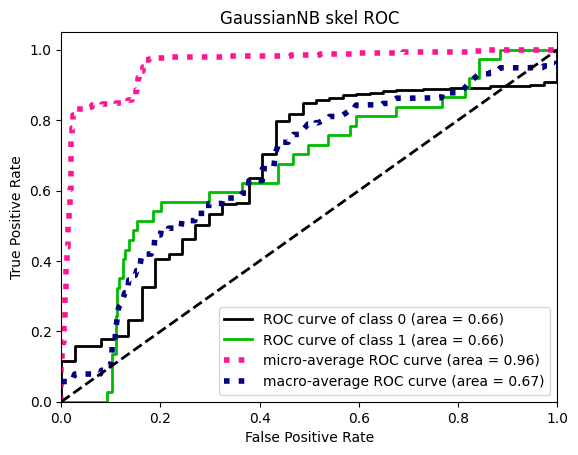

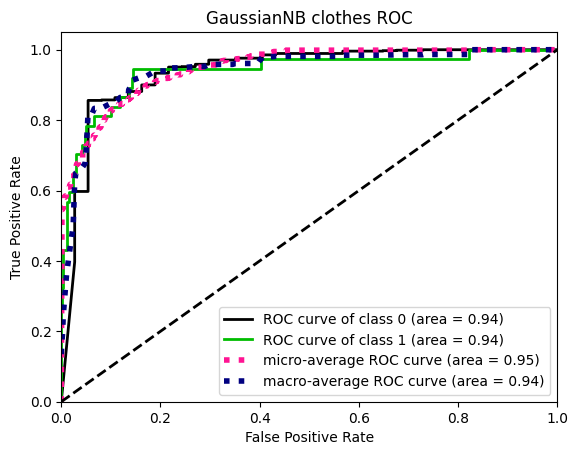

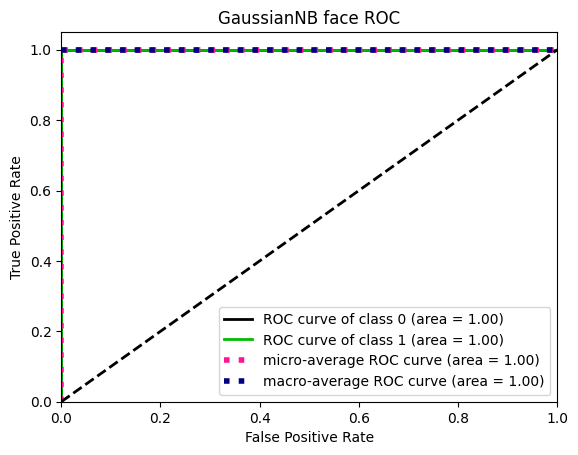

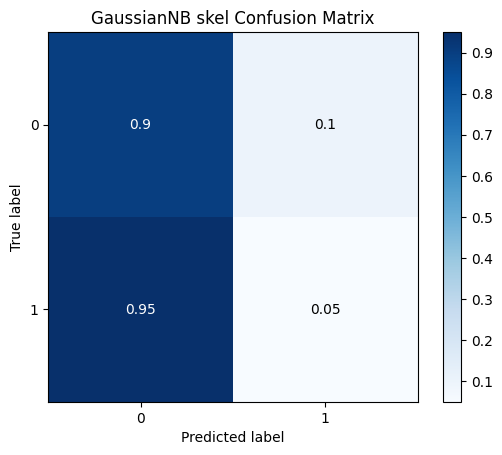

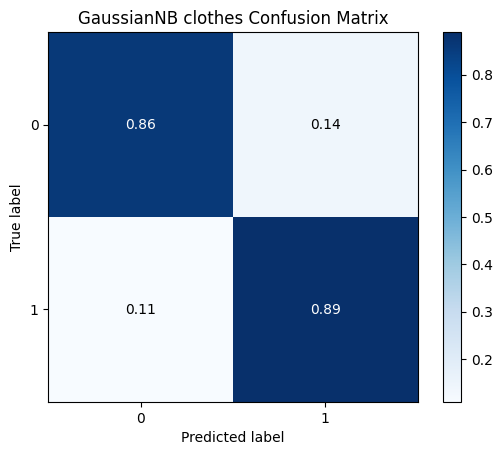

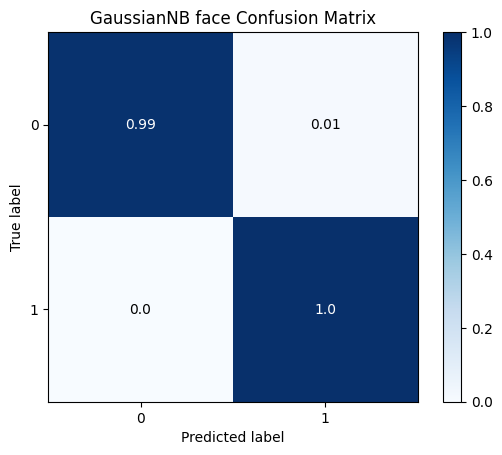

In [49]:
m1 = GaussianNB()
m2 = GaussianNB()
m3 = GaussianNB()
test_model("GaussianNB", m1, m2, m3, X_skel, X_clothes, X_face, X_skel_test, X_clothes_test,  X_face_test, y_train, y_test, y_face, y_face_test)

### SVC

----------
| SVC |
----------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       750
           1       0.00      0.00      0.00        37

    accuracy                           0.95       787
   macro avg       0.48      0.50      0.49       787
weighted avg       0.91      0.95      0.93       787

----------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       750
           1       0.00      0.00      0.00        37

    accuracy                           0.95       787
   macro avg       0.48      0.50      0.49       787
weighted avg       0.91      0.95      0.93       787

----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00         5

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.0

/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/si

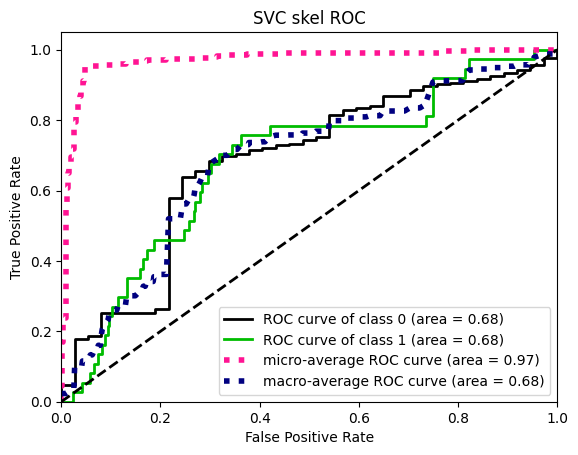

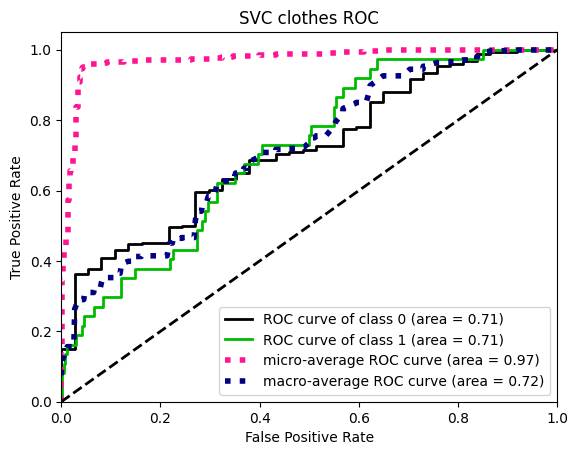

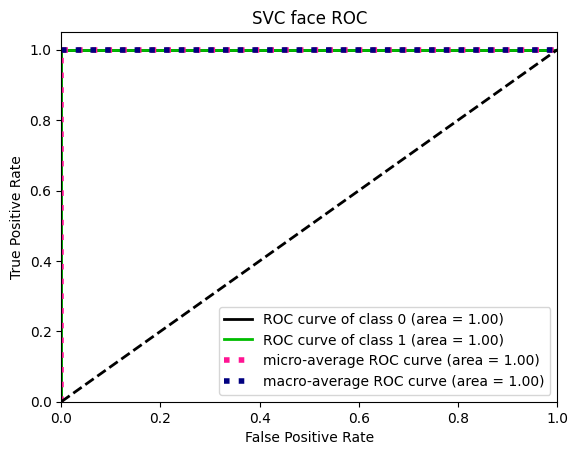

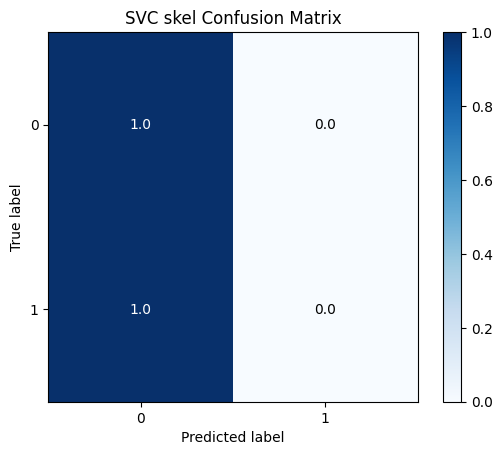

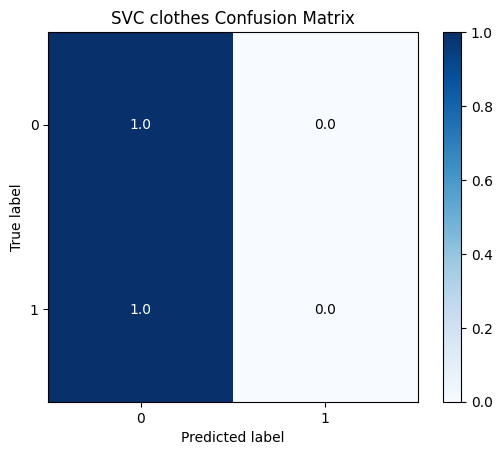

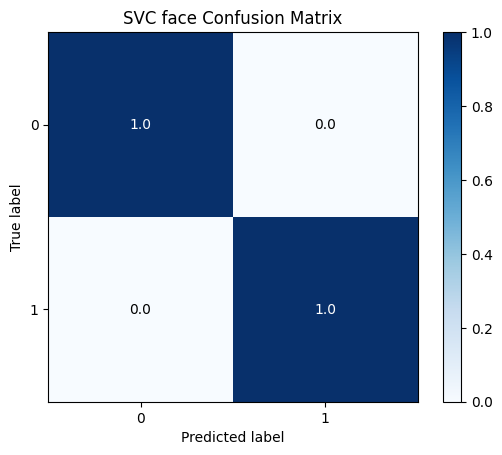

In [50]:
m1 = SVC(C = 1, kernel = "linear", degree = 3, gamma = "auto", probability = True, tol = 0.001, random_state = 42)
m2 = SVC(C = 1, kernel = "linear", degree = 3, gamma = "auto", probability = True, tol = 0.001, random_state = 42)
m3 = SVC(C = 1, kernel = "linear", degree = 3, gamma = "auto", probability = True, tol = 0.001, random_state = 42)
test_model("SVC", m1, m2, m3, X_skel, X_clothes, X_face, X_skel_test, X_clothes_test, X_face_test, y_train, y_test, y_face, y_face_test)

In [51]:
from sklearn.model_selection import GridSearchCV

def fit_models(models, X_train, y_train):
    for name, model in models.items():
        model.fit(X_train, y_train.ravel())
        print(name, 'trained.')
    return

def evaluate_models(models, X_test, y_test, x_scal, y_disc):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred,zero_division=0))
        cv_accuracy = cross_val_score(model, x_scal, y_disc.ravel(), n_jobs=-1, scoring='accuracy')
        cv_f1_macro = cross_val_score(model, x_scal, y_disc.ravel(), n_jobs=-1, scoring='f1_macro')
        print(cross_val_score(model, X_test, y_test, scoring='accuracy'))
        print("%0.4f (+/- %0.4f)" % (cv_accuracy.mean(), cv_accuracy.std() * 2))
        print(cross_val_score(model, X_test, y_test, scoring='f1_macro'))
        print("%0.4f (+/- %0.4f)" % (cv_f1_macro.mean(), cv_f1_macro.std() * 2))
        #plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True)
        plt.xlabel('Predicted')
        plt.ylabel('Truth')

        plt.show()


        print('------------------------------------')
    return  

def tune_model(model, param_grid, scoring, x_train, y_train, grid_jobs):
    print('tuning...')
    clf = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, verbose=1, n_jobs=grid_jobs)
    clf.fit(x_train, y_train.ravel())
    print('done')
    print()
    print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
    best_params = clf.best_params_.copy()
    return best_params

c0 = min(np.count_nonzero(y_train == 0), int((1/6)*y_train.shape[0]))
c1 = min(np.count_nonzero(y_train == 1), int((1/8)*y_train.shape[0]))
c2 = min(np.count_nonzero(y_train == 2), int((1/10)*y_train.shape[0]))
c3 = min(np.count_nonzero(y_train == 3), int((1/12)*y_train.shape[0]))
c4 = min(np.count_nonzero(y_train == 4), int((1/14)*y_train.shape[0]))


     

rus = RandomUnderSampler(sampling_strategy={0:c0, 1:c1, 2:c2, 3:c3,4:c4}, random_state=20)
x_tuning, y_tuning = rus.fit_resample(X_train, y_train)


     

c0 = max(np.count_nonzero(y_tuning == 0), int((1/6)*y_train.shape[0]))
c1 = max(np.count_nonzero(y_tuning == 1), int((1/8)*y_train.shape[0]))
c2 = max(np.count_nonzero(y_tuning == 2), int((1/10)*y_train.shape[0]))
c3 = max(np.count_nonzero(y_tuning == 3), int((1/12)*y_train.shape[0]))
c4 = max(np.count_nonzero(y_tuning == 4), int((1/14)*y_train.shape[0]))


     

sm = SMOTE(k_neighbors=1, n_jobs=-1, sampling_strategy={0:c0,1:c1,2:c2,3:c3,4:c4}, random_state=20)
x_tuning, y_tuning = sm.fit_resample(x_tuning, y_tuning)


     

plt.hist(y_tuning, bins=5)

SVM_param_grid = {
    'C': [0.5, 1],
    'kernel': ['rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr'],
    'random_state': [20]
}

best_accuracy_params = tune_model(SVC(), SVM_param_grid, 'accuracy', x_tuning, y_tuning, -1)

best_f1macro_params = tune_model(SVC(), SVM_param_grid, 'f1_macro',  x_tuning, y_tuning, -1)

tuned_models = {
    'SVM_accuracy': SVC(**best_accuracy_params),
    'SVM_f1macro': SVC(**best_f1macro_params)
}

fit_models(tuned_models, x_train_over, y_train_over)

evaluate_models(tuned_models, X_test, y_test, x_scal, y_disc)

NameError: name 'RandomUnderSampler' is not defined